In [22]:
# -*- coding: utf-8 -*- Line 2
#----------------------------------------------------------------------------
# Project     : Price Alarm System Enhancement - Alarm3 - Abnormal Price Detection
# Created By  : Eungi Cho
# Created Date: 07/06/22
# Updated Date: 07/06/22
# version ='1.0'
# ---------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
plt.style.use('default')

In [2]:
import pathlib
df_raw = pd.read_csv('/Users/cho-eungi/Practice/CSV/market_entry_price.csv')
df_raw = df_raw.drop_duplicates()
df_raw.head()

,source_id,country,market_id,product_id,entry_id,currency,final_unit,date,price_min,price_max,price_avg
0,201,South Africa,1487,131,92926374,ZAR,kg,2020-07-20,19.64,21.2,19.956
1,39,India,810,490,41039702,INR,kg,2020-07-06,11.80,12.5,12.200
2,41,India,2188,133,50157058,INR,kg,2020-07-06,50.00,52.7,51.400
3,556,Bangladesh,6581,545,84458922,BDT,kg,2020-07-13,4400.00,4800.0,4600.000
4,150,Turkey,2482,126,58387432,TRY,NaN,2020-07-13,10.00,15.0,11.288


In [290]:
entry_lst = np.sort(df_raw['entry_id'].unique())
np.random.seed(0)
sample_entry = np.random.choice(entry_lst, 30)
test_df = df_raw.loc[df_raw['entry_id'].isin(sample_entry)].sort_values(
    by = ['source_id', 'market_id', 'entry_id', 'date']).copy()
test_df['date'] = pd.to_datetime(test_df['date'])
test_df

,source_id,country,market_id,product_id,entry_id,currency,final_unit,date,price_min,price_max,price_avg
10251136,29,United States,329,236,94951352,USD,pound,2020-01-06,40.0,44.00,42.000000
10251137,29,United States,329,236,94951352,USD,pound,2020-01-13,42.0,47.00,44.600000
10174185,29,United States,329,236,94951352,USD,pound,2020-01-20,45.0,46.00,45.500000
10150648,29,United States,329,236,94951352,USD,pound,2020-01-27,40.0,42.00,41.000000
10040211,29,United States,329,236,94951352,USD,pound,2020-02-03,30.0,32.00,31.000000
...,...,...,...,...,...,...,...,...,...,...,...
9617790,640,South Africa,651,230,87911783,ZAR,kg,2021-01-04,17.0,21.37,18.333333
3095063,640,South Africa,1472,129,95577699,ZAR,kg,2021-01-18,60.0,72.22,58.750000
3156010,640,South Africa,1472,129,95577699,ZAR,kg,2021-01-25,60.0,59.23,55.000000
3150005,640,South Africa,1472,129,95577699,ZAR,kg,2022-01-03,75.0,75.00,75.000000


In [291]:
# W-MON date range from 2020 to 2022
# Left Join Test DF and Time DF
empty_df = pd.DataFrame()
for entry in sample_entry:
    entry_start = min(df_raw.loc[df_raw['entry_id'] == entry]['date'])
    date_range = pd.date_range(entry_start, '2022-05-31', freq = 'W-MON')
    time_df = pd.DataFrame({'date': date_range})
    
    time_df['entry_id_'] = entry
    entry_df = test_df.loc[test_df['entry_id'] == entry]
    joined_df = pd.merge(time_df, entry_df, left_on = ['date'], right_on = ['date'], how = 'left')
    empty_df = empty_df.append(joined_df)

empty_df = empty_df.drop(['entry_id'], axis = 1)
df = empty_df.copy()
df = df.sort_values(by = ['entry_id_', 'date'])
df.set_index(np.arange(len(df)), inplace=True)
df.head()

,date,entry_id_,source_id,country,market_id,product_id,currency,final_unit,price_min,price_max,price_avg
0,2020-01-06,40867745,39.0,India,1484.0,206.0,INR,kg,61.75,61.75,61.75
1,2020-01-13,40867745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-20,40867745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-27,40867745,39.0,India,1484.0,206.0,INR,kg,46.05,51.00,48.50
4,2020-02-03,40867745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


number of unique entry_id in df:  30
shape of df:  (2729, 11)
number of null price_avg data in each entry: 


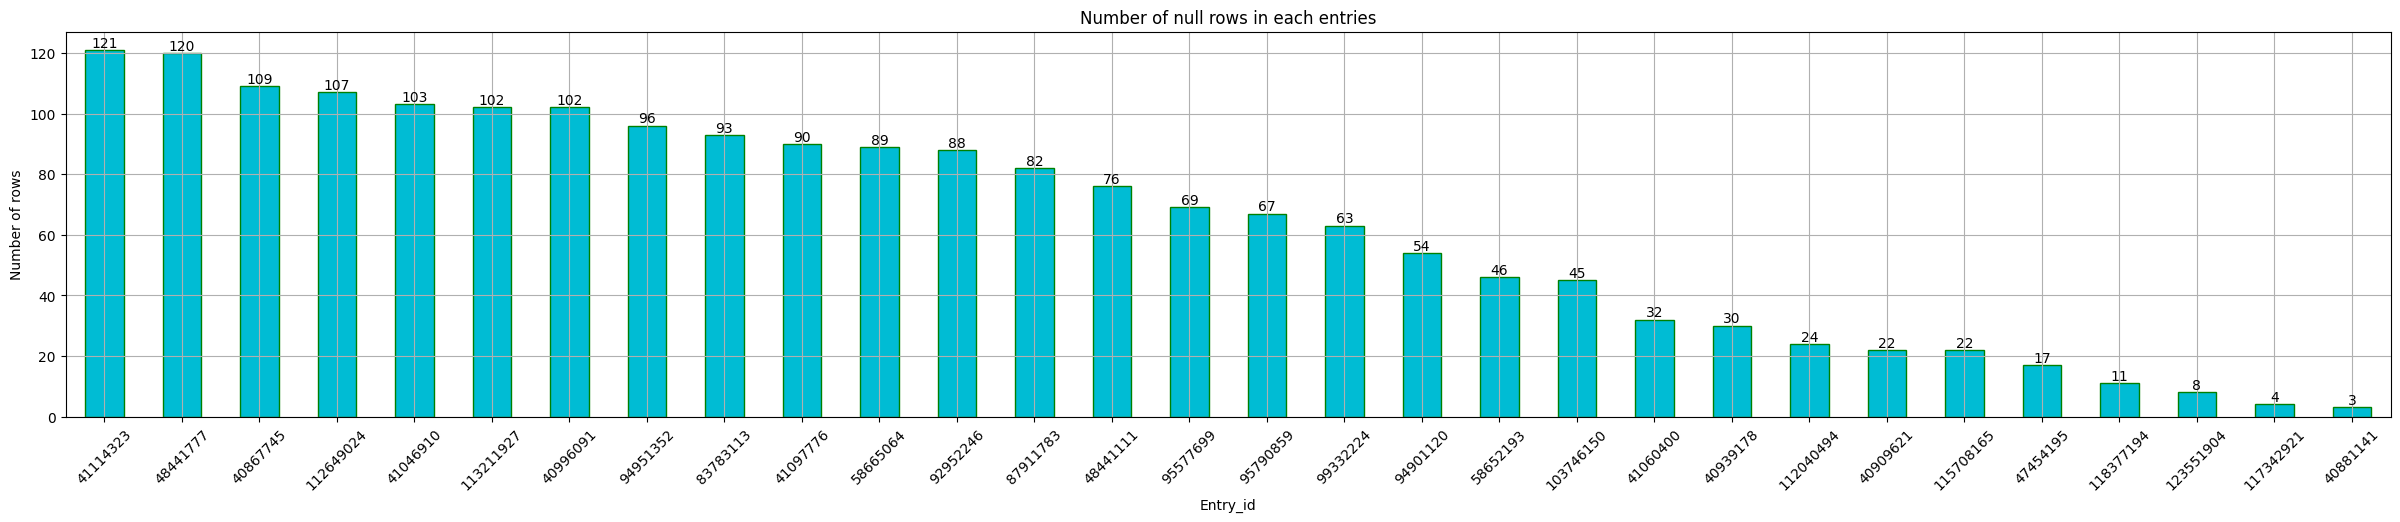

In [292]:
# Initialize a stats dataframe
df_stats = df[['date', 'entry_id_', 'product_id', 'price_avg']]

# Count null rows in each entry
def groupby_count_null(row):
    null_cnt = row.isnull().astype(int).sum()
    return null_cnt

print('number of unique entry_id in df: ', len(df.entry_id_.unique()))
print('shape of df: ', df.shape)
print('number of null price_avg data in each entry: ')

null_cnt_by_entry = df.groupby('entry_id_')['price_avg'].apply(groupby_count_null).sort_values(ascending = False)
ax = null_cnt_by_entry.plot.bar(
    rot = 45, figsize=(30, 5), title='Number of null rows in each entries', 
    fontsize=10, color='#00bcd4', edgecolor='g', linestyle='-', 
    legend=False, grid=True, xlabel='Entry_id', ylabel='Number of rows'
)
ax.bar_label(ax.containers[0])
plt.show()

In [337]:
# Count the number of outliers
def outlier_func(row, sigma=2, window = 12, display_plot = False):
    row = pd.DataFrame(row)
    # Use moving average by rolling
    average = row.rolling(window = window, min_periods = 1).mean()
    N = row - average
    std = N.std().iat[0]

    outlier_lst = []
    for i in range(len(row)):
        if (row.iat[i, 0] > average.iat[i, 0] + sigma * std) or (row.iat[i, 0] < average.iat[i, 0] - sigma * std):
            outlier_lst.append(row.iat[i, 0])
    
    if display_plot:
        plt.figure(figsize=(30, 6), dpi=80)
        
        plt.plot(row)
        plt.plot(average)
        plt.plot(average - std * sigma, '--', color='#ff0000')
        plt.plot(average + std * sigma, '--', color='#ff0000')
        plt.xlabel('Time (weeks)')
        plt.ylabel('Price')
        plt.title('Outlier detection (sigma=' + str(sigma) + ')')
        plt.legend(['Price', 'Moving average', 'Lower bound', 'Upper bound'])

        plt.show()
        
    return len(outlier_lst), outlier_lst

In [294]:
df_pivot = df.pivot_table(['price_avg'], index = ['entry_id_'], columns = ['date'])

# window = 3, sigma = 1, 2, 3
df_pivot['outlier_cnt_window3', 'sigma1'] = df_pivot.apply(lambda row: outlier_func(row.values[~np.isnan(row.values)], sigma = 1, window = 3), axis = 1)
df_pivot['outlier_cnt_window3', 'sigma2'] = df_pivot.apply(lambda row: outlier_func(row.values[~np.isnan(row.values)], sigma = 2, window = 3), axis = 1)
df_pivot['outlier_cnt_window3', 'sigma3'] = df_pivot.apply(lambda row: outlier_func(row.values[~np.isnan(row.values)], sigma = 3, window = 3), axis = 1)
# window = 4. sigma = 1, 2, 3
df_pivot['outlier_cnt_window4', 'sigma1'] = df_pivot.apply(lambda row: outlier_func(row.values[~np.isnan(row.values)], sigma = 1, window = 4), axis = 1)
df_pivot['outlier_cnt_window4', 'sigma2'] = df_pivot.apply(lambda row: outlier_func(row.values[~np.isnan(row.values)], sigma = 2, window = 4), axis = 1)
df_pivot['outlier_cnt_window4', 'sigma3'] = df_pivot.apply(lambda row: outlier_func(row.values[~np.isnan(row.values)], sigma = 3, window = 4), axis = 1)
# window = 5. sigma = 1, 2, 3
df_pivot['outlier_cnt_window5', 'sigma1'] = df_pivot.apply(lambda row: outlier_func(row.values[~np.isnan(row.values)], sigma = 1, window = 5), axis = 1)
df_pivot['outlier_cnt_window5', 'sigma2'] = df_pivot.apply(lambda row: outlier_func(row.values[~np.isnan(row.values)], sigma = 2, window = 5), axis = 1)
df_pivot['outlier_cnt_window5', 'sigma3'] = df_pivot.apply(lambda row: outlier_func(row.values[~np.isnan(row.values)], sigma = 3, window = 5), axis = 1)

df_pivot.head()

price_avg                                          \
date      2020-01-06 00:00:00 2020-01-13 00:00:00 2020-01-20 00:00:00   
entry_id_                                                               
40867745                61.75                 NaN                 NaN   
40881141                 2.00            2.000000                 2.0   
40909621                30.00           30.000000                30.0   
40939178                40.20           39.333333                39.5   
40996091               675.00          675.000000               725.0   

                                                                       \
date      2020-01-27 00:00:00 2020-02-03 00:00:00 2020-02-10 00:00:00   
entry_id_                                                               
40867745            48.500000                 NaN                 NaN   
40881141             2.000000                2.00                2.00   
40909621            29.200000               26.00               17.00   
40939178            40.083333               37.75               37.75   
40996091           725.000000              675.00              575.00   

                                                                       \
date      2020-02-17 00:00:00 2020-02-24 00:00:00 2020-03-02 00:00:00   
entry_id_                                                               
40867745                  NaN                 NaN                 NaN   
40881141                 2.00                 2.0                 2.0   
40909621                26.00                26.0                26.0   
40939178                37.75                38.5                36.0   
40996091               625.00               625.0               700.0   

                               ...                     outlier_cnt_window3  \
date      2020-03-09 00:00:00  ... 2022-05-23 00:00:00              sigma1   
entry_id_                      ...                                           
40867745                  NaN  ...                 NaN                   5   
40881141                  2.0  ...                 NaN                  26   
40909621                 26.0  ...                 NaN                  19   
40939178                 33.5  ...                 NaN                  11   
40996091                700.0  ...                 NaN                   7   

                        outlier_cnt_window4               outlier_cnt_window5  \
date      sigma2 sigma3              sigma1 sigma2 sigma3              sigma1   
entry_id_                                                                       
40867745       1      1                   5      2      0                   6   
40881141       1      2                   3      4      3                   5   
40909621       7      3                  16      5      4                  15   
40939178       7      3                  11      7      5                  12   
40996091       1      1                   4      2      1                   4   

                         
date      sigma2 sigma3  
entry_id_                
40867745       2      0  
40881141       4      2  
40909621       5      3  
40939178       8      3  
40996091       3      2  

[5 rows x 134 columns]

In [295]:
def calculate_volatility(row):
    notnull_row = row.values[~np.isnan(row.values)]
    if len(notnull_row) > 0.5 * len(row):
        chg_rate_lst = [(notnull_row[i] - notnull_row[i-1]) * 100 / notnull_row[i-1] for i in range(1, len(notnull_row))]
        volatility = np.std(chg_rate_lst)
    else:
        volatility = np.nan
    return volatility

volatility_series = df.groupby('entry_id_')['price_avg'].apply(lambda row: calculate_volatility(row))
volatility_series[volatility_series.values == volatility_series.max()]

entry_id_
58652193    97.281056
Name: price_avg, dtype: float64

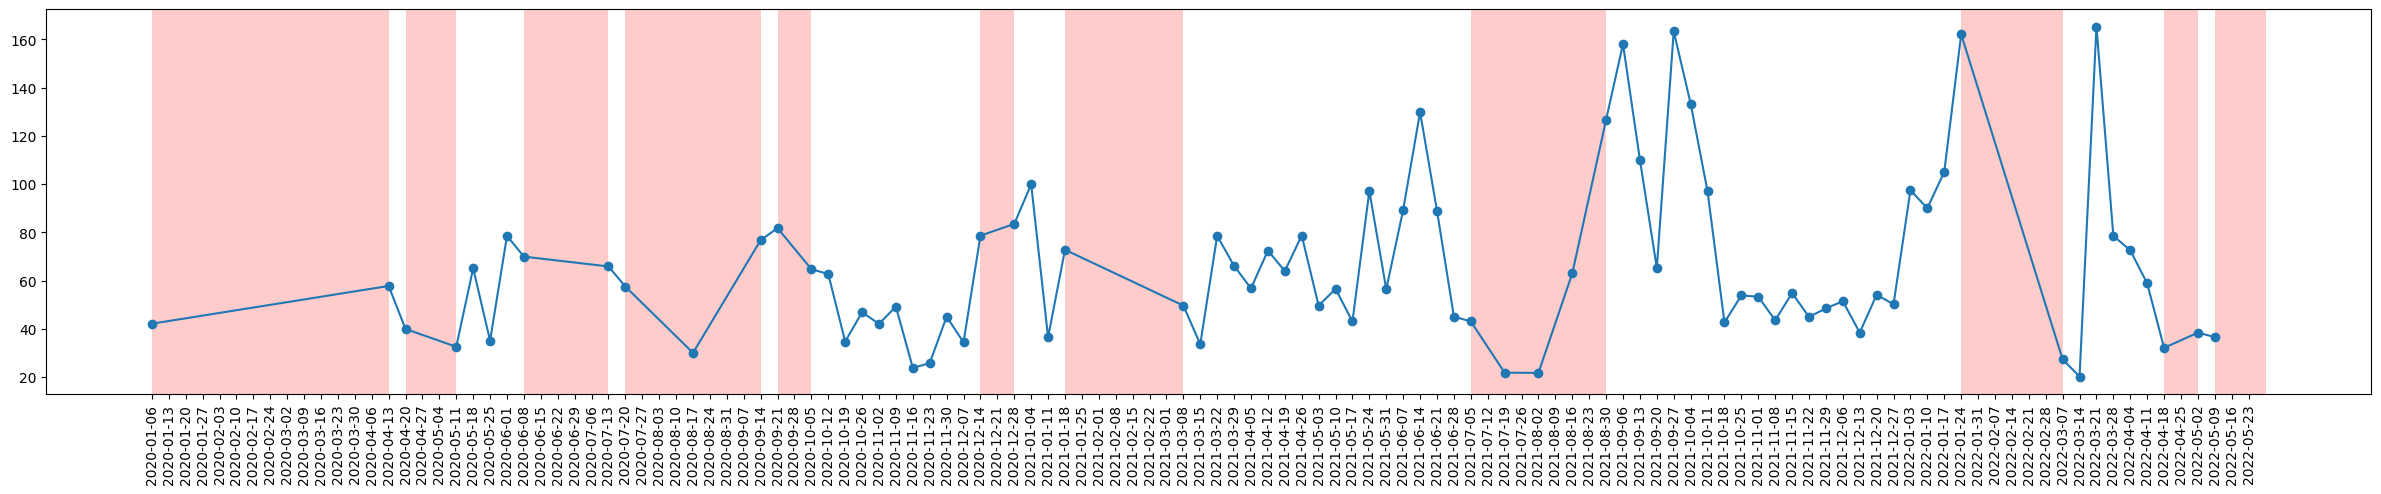

In [296]:
# Define function: Plot sample data with full time period
def plot_sample_with_ft(entry_id):
    sample_entry = df_pivot[df_pivot.index == entry_id].iloc[0, :-9].unstack().T

    is_nan = sample_entry['price_avg'].isna()
    n_groups = is_nan.ne(is_nan.shift()).cumsum()
    gap_list = sample_entry[is_nan].groupby(n_groups).aggregate(
        lambda x: (
            x.index[0] + pd.DateOffset(days=-7),
            x.index[-1] + pd.DateOffset(days=+7)
        )
    )["price_avg"].values

    series1 = sample_entry['price_avg'].astype(np.double)
    s1mask = np.isfinite(series1) # masking NaN or np.inf or np.NINF

    plt.figure(figsize = (30,5))
    plt.plot(sample_entry.index[s1mask], series1[s1mask], linestyle='-', marker='o')
    plt.xticks(sample_entry.index, rotation = 90)

    for gap in gap_list:
        plt.axvspan(gap[0], gap[1], facecolor='r', alpha=0.2)
    plt.show()

plot_sample_with_ft(entry_id = 58652193)

In [297]:
# Plot confidence bands of sample entry
sample_entry = df_pivot[df_pivot.index == 58652193].iloc[0, :-9]
sample_entry = sample_entry.values[~np.isnan(sample_entry.values)]
print(f'''
window3, sigma2: 
{df_pivot[df_pivot.index == 58652193]['outlier_cnt_window3', 'sigma2']}

window3, sigma3:
{df_pivot[df_pivot.index == 58652193]['outlier_cnt_window3', 'sigma3']}

window4, sigma2: 
{df_pivot[df_pivot.index == 58652193]['outlier_cnt_window4', 'sigma2']}

window4, sigma3: 
{df_pivot[df_pivot.index == 58652193]['outlier_cnt_window4', 'sigma3']}

window5, sigma2: 
{df_pivot[df_pivot.index == 58652193]['outlier_cnt_window5', 'sigma2']}

window5, sigma3: 
{df_pivot[df_pivot.index == 58652193]['outlier_cnt_window5', 'sigma3']}
''')


window3, sigma2: 
entry_id_
58652193    5
Name: (outlier_cnt_window3, sigma2), dtype: int64

window3, sigma3:
entry_id_
58652193    1
Name: (outlier_cnt_window3, sigma3), dtype: int64

window4, sigma2: 
entry_id_
58652193    6
Name: (outlier_cnt_window4, sigma2), dtype: int64

window4, sigma3: 
entry_id_
58652193    0
Name: (outlier_cnt_window4, sigma3), dtype: int64

window5, sigma2: 
entry_id_
58652193    7
Name: (outlier_cnt_window5, sigma2), dtype: int64

window5, sigma3: 
entry_id_
58652193    0
Name: (outlier_cnt_window5, sigma3), dtype: int64



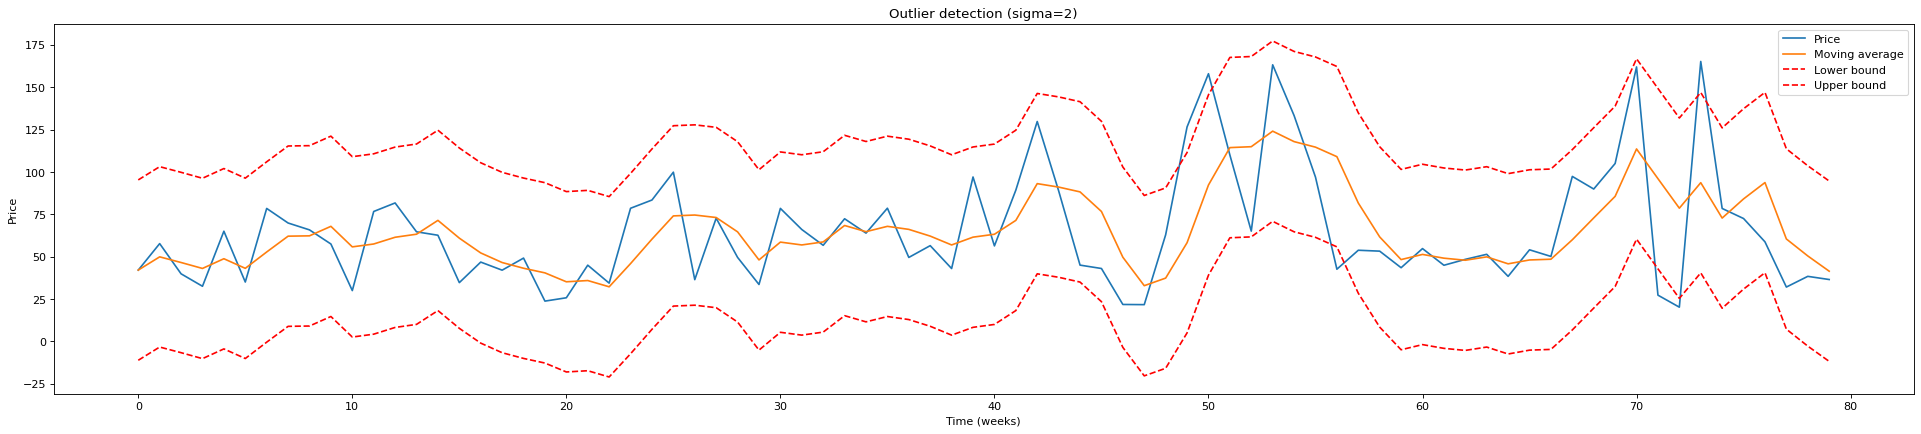

6

In [298]:
outlier_func(sample_entry, window = 4, sigma = 2, display_plot = True)

In [338]:
# Count the number of outliers: Use Standardization
def outlier_func_(row, sigma=2, window = 12, display_plot = False):
    row = pd.DataFrame(row)
    # Use moving average by rolling
    average = row.rolling(window = window, min_periods = 1).mean()
    # Standardization of average
    Z = (average - average.mean()) / average.std()
    outlier_lst = []
    for i in range(len(row)):
        if (row.iat[i, 0] - average.iat[i, 0]) / average.std().iat[0] > Z.iat[i, 0] + sigma or (row.iat[i, 0] - average.iat[i, 0]) / average.std().iat[0] < Z.iat[i, 0] - sigma:
            outlier_lst.append(row.iat[i, 0])
    
    if display_plot:
        plt.figure(figsize=(30, 6), dpi=80)
        
        plt.plot((row - average) / average.std())
        plt.plot(Z)
        plt.plot(Z - sigma, '--', color='#ff0000')
        plt.plot(Z + sigma, '--', color='#ff0000')
        plt.xlabel('Time (weeks)')
        plt.ylabel('Standardized Price')
        plt.title('Outlier detection (sigma=' + str(sigma) + ')')
        plt.legend(['Price', 'Moving average', 'Lower bound', 'Upper bound'])

        plt.show()
        
    return len(outlier_lst), outlier_lst

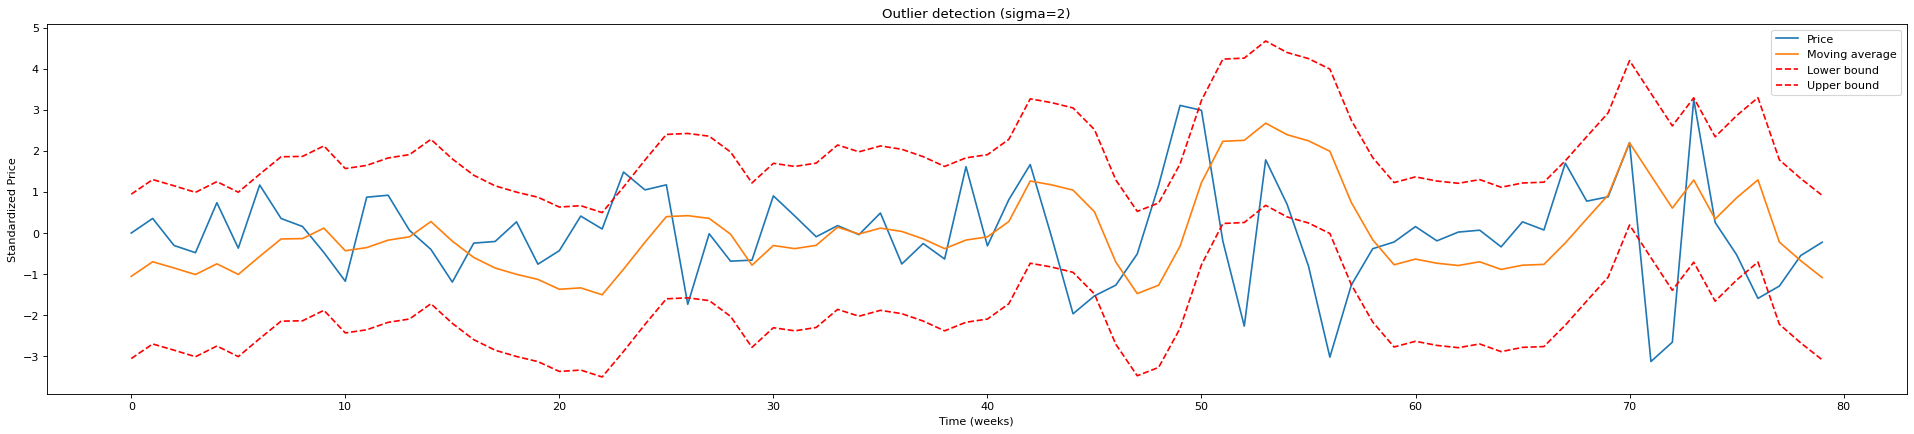

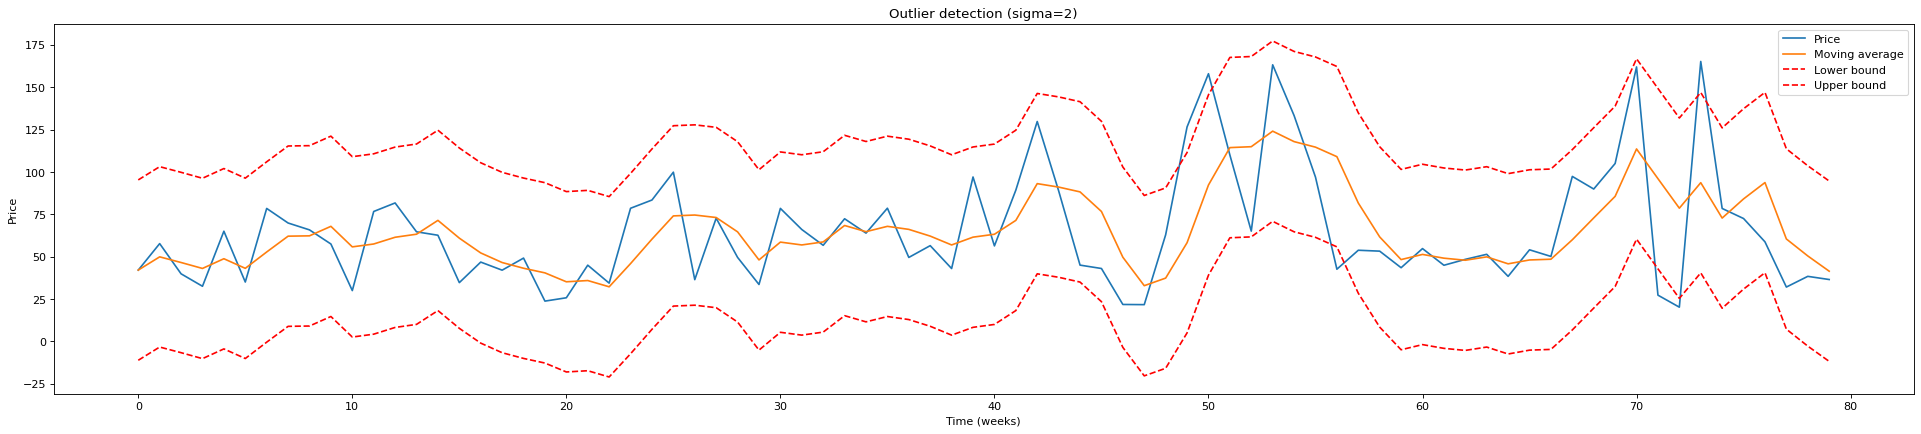

표준화를 진행했을 경우: 14, [78.6, 36.45, 45.0333333333, 43.04, 62.95, 126.6, 110.06, 65.1, 97.0, 42.6166666667, 53.8166666667, 27.3, 20.1999998728, 58.7833328247]
Vincent 방식으로 진행했을 경우: 6, [126.6, 158.0333333333, 42.6166666667, 27.3, 20.1999998728, 165.2750015259]


In [339]:
df_pivot_test = df.pivot_table(['price_avg'], index = ['entry_id_'], columns = ['date'])
df_pivot_test = df_pivot_test[df_pivot_test.index == 58652193]
test_array = df_pivot_test.values[~np.isnan(df_pivot_test.values)]

error_cnt1, outlier_lst1 = outlier_func_(test_array, sigma = 2, window = 4, display_plot = True)
error_cnt2, outlier_lst2 = outlier_func(test_array, sigma = 2, window = 4, display_plot = True)
print(f'''표준화를 진행했을 경우: {error_cnt1}, {outlier_lst1}
Vincent 방식으로 진행했을 경우: {error_cnt2}, {outlier_lst2}''')